# Prediction of the affinity of potential ligands for our problem


---

## Summary

- Preparation of the data

    We use just the ligand which have a value of Kd in the PDBBinnd dataset

- Use of the continuous variable "value" to predict

    - Prediction of affinity with the potential ligands and the ATP pocket
    - Prediction of affinity with the potential ligands and the ARN pocket
    - Ligand in common with the two predictions

In [1]:
from molzip_adapted import regression_one, regression, projection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Preparation of the data

In [2]:
path_data = "../data/"
# data that we know the binding affinity
data_pdb_kd = pd.read_csv(path_data+"data_PDB_Kd.csv")
# data of ligands that we want to predict
data_5000 = pd.read_csv(path_data+"pilot_library.csv")

In [10]:
# pockets that we want to predict the affinity with the ligands
pockets = pd.read_csv(path_data+"pockets.csv",sep =";")
pocket_atp = pockets["seq"][0]
pocket_arn = pockets["seq"][1]

In [11]:
# Concatenation of the ligands the pocket
liste_complexe_atp = []
liste_complexe_arn = []

liste_ligand_5000 = data_5000["smiles"].dropna()

for ligand in liste_ligand_5000:
    liste_complexe_atp.append(ligand+pocket_atp)
    liste_complexe_arn.append(ligand+pocket_arn)


liste_complexe_atp = np.array(liste_complexe_atp)
liste_complexe_arn = np.array(liste_complexe_arn)

In [12]:
X_train = np.array(data_pdb_kd["lig+seq"])
Y_train = np.array(data_pdb_kd["value"])

## Use of the continuous variable "value" to predict

### Prediction of affinity with the potential ligands and the ATP pocket

In [13]:
pred_atp = regression(liste_complexe_atp, X_train, Y_train, k=1)

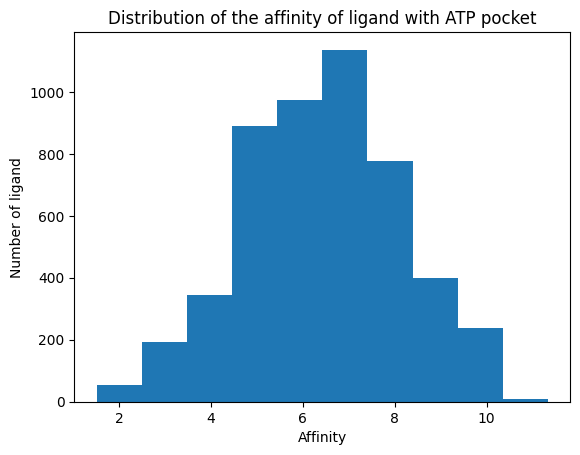

In [14]:
plt.figure()
plt.hist(pred_atp)
plt.xlabel("Affinity")
plt.ylabel("Number of ligand")
plt.title("Distribution of the affinity of ligand with ATP pocket")
plt.show()

In [15]:
top = 20
df_result_atp = pd.DataFrame()

# Descending sorting to take the higher value of affinity
sorted_idx = np.argsort(-pred_atp)
top_affinity_atp = pred_atp[sorted_idx[:top]]
top_ligand_atp = data_5000["eos"][sorted_idx[:top]]

df_result_atp["Top ligand with ATP pocket"] = top_ligand_atp
df_result_atp["ATP affinity"] = top_affinity_atp
df_result_atp.index = np.arange(20)
df_result_atp

,Top ligand with ATP pocket,ATP affinity
0,EOS100801,11.33
1,EOS100070,10.70
2,EOS100160,10.51
3,EOS308,10.42
4,EOS100280,10.42
5,EOS101233,10.40
6,EOS101967,10.40
7,EOS101773,10.40
8,EOS310,10.40
9,EOS101183,10.40


### Prediction of affinity with the potential ligands and the ARN pocket

In [16]:
pred_arn = regression(liste_complexe_arn, X_train, Y_train, k=1)

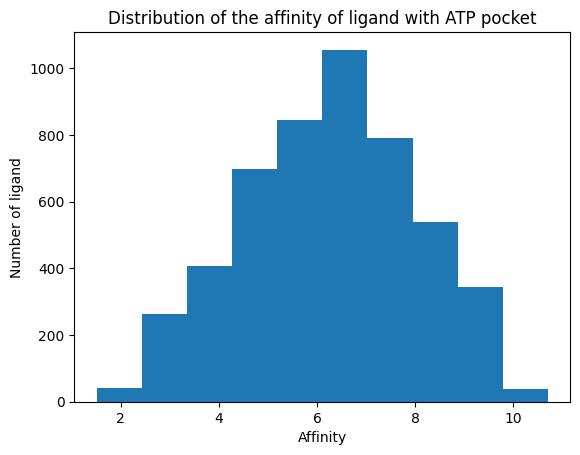

In [17]:
plt.figure()
plt.hist(pred_arn)
plt.xlabel("Affinity")
plt.ylabel("Number of ligand")
plt.title("Distribution of the affinity of ligand with ATP pocket")
plt.show()

In [18]:
top = 20
df_result_arn = pd.DataFrame()

# Descending sorting to take the higher value of affinity
sorted_idx = np.argsort(-pred_arn)
top_affinity_arn = pred_arn[sorted_idx[:top]]
top_ligand_arn = data_5000["eos"][sorted_idx[:top]]

df_result_arn["Top ligand with ARN pocket"] = top_ligand_arn
df_result_arn["ARN affinity"] = top_affinity_arn
df_result_arn.index = np.arange(20)
df_result_arn

,Top ligand with ARN pocket,ARN affinity
0,EOS100070,10.70
1,EOS100160,10.51
2,EOS102060,10.42
3,EOS101726,10.42
4,EOS100280,10.42
5,EOS101463,10.40
6,EOS101780,10.40
7,EOS101571,10.40
8,EOS438,10.40
9,EOS101257,10.40


### Ligand in common with the two predictions

In [19]:
top_ligand_at = np.array(top_ligand_atp)
for i in top_ligand_arn:
    if i in top_ligand_at:
        print(i)

EOS100070
EOS100160
EOS100280
EOS101967
EOS101233
EOS101390
EOS102160


In [20]:
df_all = pd.concat([df_result_arn,df_result_atp],axis=1)
df_all.to_csv('result_molzip.csv')
df_all

,Top ligand with ARN pocket,ARN affinity,Top ligand with ATP pocket,ATP affinity
0,EOS100070,10.70,EOS100801,11.33
1,EOS100160,10.51,EOS100070,10.70
2,EOS102060,10.42,EOS100160,10.51
3,EOS101726,10.42,EOS308,10.42
4,EOS100280,10.42,EOS100280,10.42
5,EOS101463,10.40,EOS101233,10.40
6,EOS101780,10.40,EOS101967,10.40
7,EOS101571,10.40,EOS101773,10.40
8,EOS438,10.40,EOS310,10.40
9,EOS101257,10.40,EOS101183,10.40
